In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import mplfinance as mpf

In [2]:
mpf.__file__

'/bb/mbigd/mbig5/jupven/mplfinance/src/mplfinance/__init__.py'

In [3]:
daily = pd.read_csv('../data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(2)
daily.tail(2)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


axes.grid= True
axes.grid.axis= both
axes.grid.which= major
grid.alpha= 1.0
grid.color= white
grid.linestyle= -
grid.linewidth= 0.8


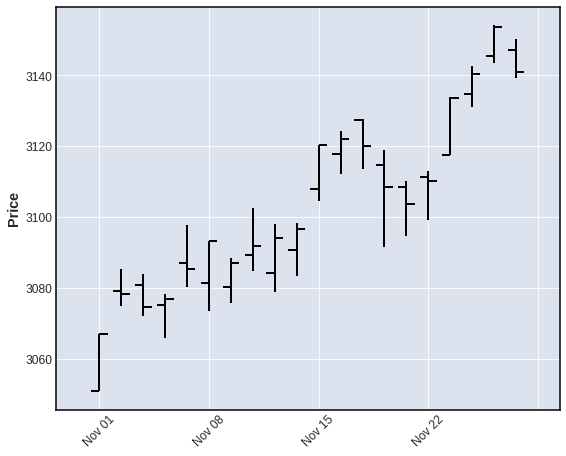

In [4]:
mpf.plot(daily)

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
plt.rcParams == mpl.rcParams

True

In [34]:
#%%writefile rcp_to_df.py
def rcParams_to_df(rcp,name=None):
    keys = []
    vals = []
    for item in rcp:
        keys.append(item)
        vals.append(rcp[item])
    df = pd.DataFrame(vals,index=pd.Index(keys,name='rcParams Key'))
    if name is not None:
        df.columns = [name]
    else:
        df.columns = ['Value']
    return df

Writing rcp_to_df.py


In [8]:
df = rcParams_to_df(mpl.rcParams)

In [9]:
df.head()

,Value
rcParams Key,
_internal.classic_mode,False
agg.path.chunksize,0
animation.avconv_args,[]
animation.avconv_path,avconv
animation.bitrate,-1


In [10]:
df[df.index.str.contains('prop')]

,Value
rcParams Key,
axes.prop_cycle,"({'color': '#1f77b4'}, {'color': '#ff7f0e'}, {..."
boxplot.boxprops.color,black
boxplot.boxprops.linestyle,-
boxplot.boxprops.linewidth,1
boxplot.capprops.color,black
boxplot.capprops.linestyle,-
boxplot.capprops.linewidth,1
boxplot.flierprops.color,black
boxplot.flierprops.linestyle,none


In [11]:
STOP HERE

SyntaxError: invalid syntax (<ipython-input-11-a6774c8535dd>, line 1)

In [ ]:
df[df.index.str.contains('cyc')]
#df[df.index.str.contains('color')]
df[df.index.str.contains('grid')]

In [ ]:
df[df.index.str.contains('axes.prop')]

In [ ]:
df[df.index.str.contains('grid')]

In [ ]:
colors = [item['color'] for item in mpl.rcParams['axes.prop_cycle']]
colors

In [ ]:
df[df.index.str.contains('bar')]

In [ ]:
df1 = rcParams_to_df(mpl.rcParams)

In [27]:
def rcparams_compare_styles(s1,s2):
    with plt.rc_context():
         plt.style.use('default')
         plt.style.use(s1)
         df1 = rcParams_to_df(plt.rcParams,name=s1)

    with plt.rc_context():
         plt.style.use('default')
         plt.style.use(s2)
         df2 = rcParams_to_df(plt.rcParams,name=s2)
    
    df  = pd.concat([df1,df2],axis=1)
    dif = df[df[s1] != df[s2]].dropna(how='all')
    
    return (dif,df,df1,df2)

In [31]:
dfs = rcparams_compare_styles('fast','dark_background')

In [32]:
dfs[0]
len(dfs[0])

,fast,dark_background
rcParams Key,,
agg.path.chunksize,10000,0
axes.edgecolor,black,white
axes.facecolor,white,black
axes.labelcolor,black,white
axes.prop_cycle,"({'color': '#1f77b4'}, {'color': '#ff7f0e'}, {...","({'color': '#8dd3c7'}, {'color': '#feffb3'}, {..."
figure.edgecolor,white,black
figure.facecolor,white,black
grid.color,#b0b0b0,white
lines.color,C0,white


16

In [ ]:
%matplotlib inline
import random

In [ ]:
def mybarplot():
    fig = plt.figure()
    ax  = fig.add_axes( [0.15,0.18,0.70,0.70])
    x   = [jj for jj in range(0,10)]
    y   = [random.randint(0,10) for jj in range(0,10)]
    ax.bar(x,y,color='#dbdbdb')
    plt.show()

In [ ]:
plt.style.use('classic')
mybarplot()

In [ ]:
df = pd.concat([d1,d2],axis=1)

In [ ]:
diff = df[df['classic'] != df['fast']]

In [ ]:
diff.head()

In [ ]:
plt.style.use('seaborn-darkgrid')

In [ ]:
df2 = rcParams_to_df(mpl.rcParams)

In [ ]:
for item in mpl.rcParams:
    if 'grid' in item:
        print(item,mpl.rcParams[item])

In [ ]:
type(mpl.rcParams['grid.linestyle'])

In [ ]:
df1.columns = ['Val 1']
df2.columns = ['Val 2']
df = pd.concat([df1,df2],axis=1)

In [ ]:
df.head()

In [ ]:
ddf = df[ df['Val 1'] != df['Val 2'] ]
ddf

In [ ]:
ddf['Val 2']

In [ ]:
ddf[ ddf.index.str.contains('grid') ]

In [ ]:
df[df.index.str.contains('grid')]

In [ ]:
temp = dict(axes.edgecolor='black',axes.axisbelow=True)

In [ ]:
temp = { 'axes.edgecolor':'black','axes.axisbelow':True }
temp

In [ ]:
mavcolors=['turquoise','gold','magenta']

In [ ]:
from matplotlib import colors as mcolors

In [ ]:
for c in mavcolors:
    rgba = mcolors.to_rgba(c,1.0)
    h = mcolors.to_hex(c)
    print(h,rgba,c)

In [ ]:
for c in mavcolors:
    rgba = mcolors.to_rgba(c,1.0)
    h = mcolors.to_hex(rgba)
    print(h,rgba,c)

In [ ]:
import matplotlib as mpl
colors = [item['color'] for item in mpl.rcParams['axes.prop_cycle']]
colors

In [ ]:
type(mpl.rcParams['axes.prop_cycle'])

In [ ]:
from cycler import cycler

In [ ]:
ccs = ['#40e0d0','#ffd700','#ff00ff']
ccyc = cycler(color=ccs)

In [ ]:
type(ccyc)

In [ ]:
['#40e0d0','#ffd700','#ff00ff',
 '#1f77b4','#ff7f0e','#2ca02c',
 '#d62728','#9467bd','#8c564b',
 '#e377c2','#7f7f7f','#bcbd22',
 '#17becf']

In [ ]:
ohlc='inheri'
ohlc == 'inherit'[0:len(ohlc)]